In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [46]:
df = pd.read_csv('benchmark_data.csv')
df = df.drop(columns=["Unnamed: 0"])
df_optim = df[df["Optimisation_time"]!=0]
df = df[df["Optimisation_time"]==0]
df = df.drop(columns=["Optimisation_time"])
map_sizes = ["small", "medium", "large", "xlarge"]
obstacle_coverages = [0, 0.1, 0.2, 0.3, 0.4, 0.5]
algorithms = ["astar", "rrt", "rrt*", "informed rrt*", "fmt*", "bit*"]

In [47]:
print(df.columns)
print(pd.unique(df["Algorithm"]))

Index(['Algorithm', 'Size', 'Obstacle Coverage', 'Path Length', 'Time'], dtype='object')
['astar' 'rrt' 'rrt*' 'informed rrt*' 'fmt*' 'bit*']


In [48]:
def process_data(data):
    columns = data.columns
    algorithms = pd.unique(data["Algorithm"])
    algo_data = {}
    for algorithm in algorithms:
        algo_data[algorithm] = data[data["Algorithm"]==algorithm].groupby(["Size", "Obstacle Coverage"])
        mean = algo_data[algorithm].mean().rename(columns={'Path Length': 'Mean Length', 'Time': 'Mean Time'})
        var = algo_data[algorithm].var().rename(columns={'Path Length': 'Var Length', 'Time': 'Var Time'})
        algo_data[algorithm] = pd.concat([mean, var], axis=1)
    return algo_data

In [49]:
algo_data = process_data(df)
algo_data_optim = process_data(df_optim)

/var/folders/ft/9dhchwd92nq_lyrh2_7rvqn00000gn/T/ipykernel_5015/3978561709.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean = algo_data[algorithm].mean().rename(columns={'Path Length': 'Mean Length', 'Time': 'Mean Time'})
/var/folders/ft/9dhchwd92nq_lyrh2_7rvqn00000gn/T/ipykernel_5015/3978561709.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.var is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  var = algo_data[algorithm].var().rename(columns={'Path Length': 'Var Length', 'Time': 'Var Time'})
/var/folders/ft/9dhchwd92nq_lyrh2_7rvqn00000gn/T/ipykernel_5015/3978561709.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is d

In [50]:
def plot_timeLength(data):
    large30Data = pd.DataFrame()
    for algo in data.keys():
        large30Data = pd.concat([large30Data, data[algo].loc['large', 10]], axis=1)
    large30Data = large30Data.T
    large30Data.index = list(data.keys())
    large30Data = large30Data.reset_index().rename(columns={'index': 'Algorithm'})
    colorlist = list(colors.ColorConverter.colors.keys())
    fig, ax = plt.subplots()
    [large30Data.iloc[[i]].plot.scatter('Mean Time', 'Mean Length', ax=ax, s=50, label=l, color=colorlist[i % len(colorlist)], logy=True, yerr='Var Length',  grid=True)  for i,l in enumerate(list(data.keys()))]

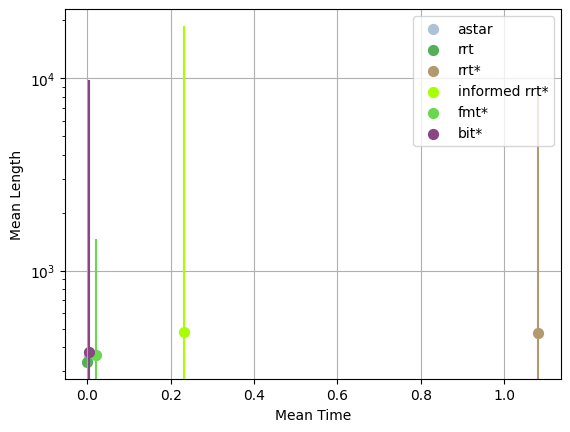

In [51]:
plot_timeLength(algo_data)

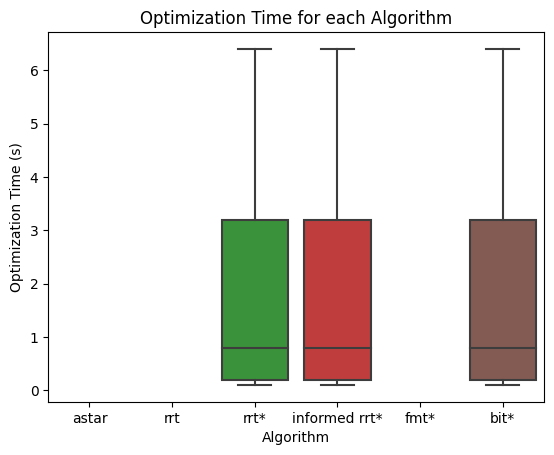

In [52]:
import seaborn as sns

optim_times = [df_optim[df_optim['Algorithm'] == algo]['Optimisation_time'] for algo in algorithms]

sns.boxplot(data=optim_times)
plt.xticks(range(len(algorithms)), algorithms)
plt.xlabel('Algorithm')
plt.ylabel('Optimization Time (s)')
plt.title('Optimization Time for each Algorithm')
plt.show()

In [54]:
def plot_obstacle_coverage(data):
    algorithms = ["astar", "rrt", "rrt*", "informed rrt*", "fmt*", "bit*"]
    obstacle_coverages = [0, 0.1, 0.2, 0.3, 0.4, 0.5]
    map_size = 'medium'
    colors = ['b', 'g', 'r', 'c', 'm', 'y']
    fig, ax = plt.subplots(figsize=(10,6))
    for i, algorithm in enumerate(algorithms):
        data_slice = data[algorithm].loc[map_size]
        ax.plot(obstacle_coverages, data_slice['Mean Time'], label=algorithm, color=colors[i])
        ax.fill_between(obstacle_coverages, data_slice['Mean Time']-data_slice['Var Time'], data_slice['Mean Time']+data_slice['Var Time'], alpha=0.3, color=colors[i])
    ax.set_xlabel('Obstacle Coverage')
    ax.set_ylabel('Time')
    ax.set_title(f'Mean Planning Time for {map_size.capitalize()} Map')
    ax.legend()
    plt.show()

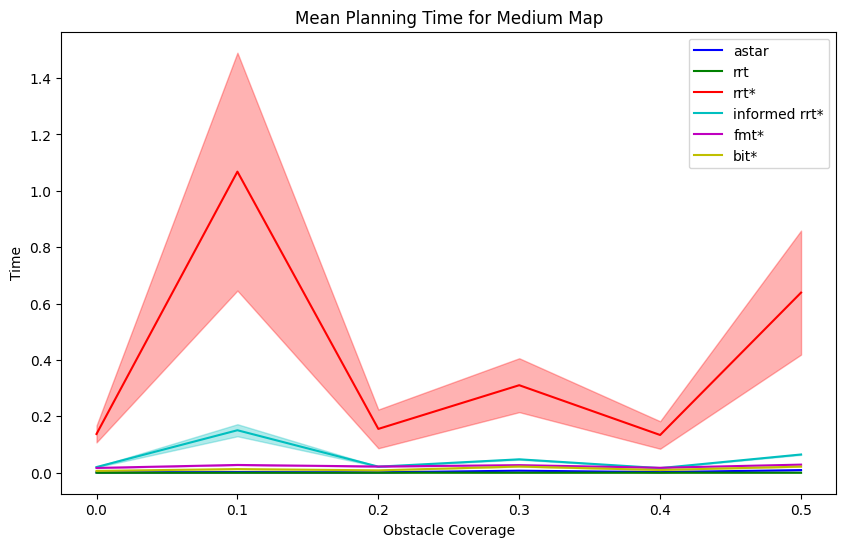

In [55]:
plot_obstacle_coverage(algo_data)

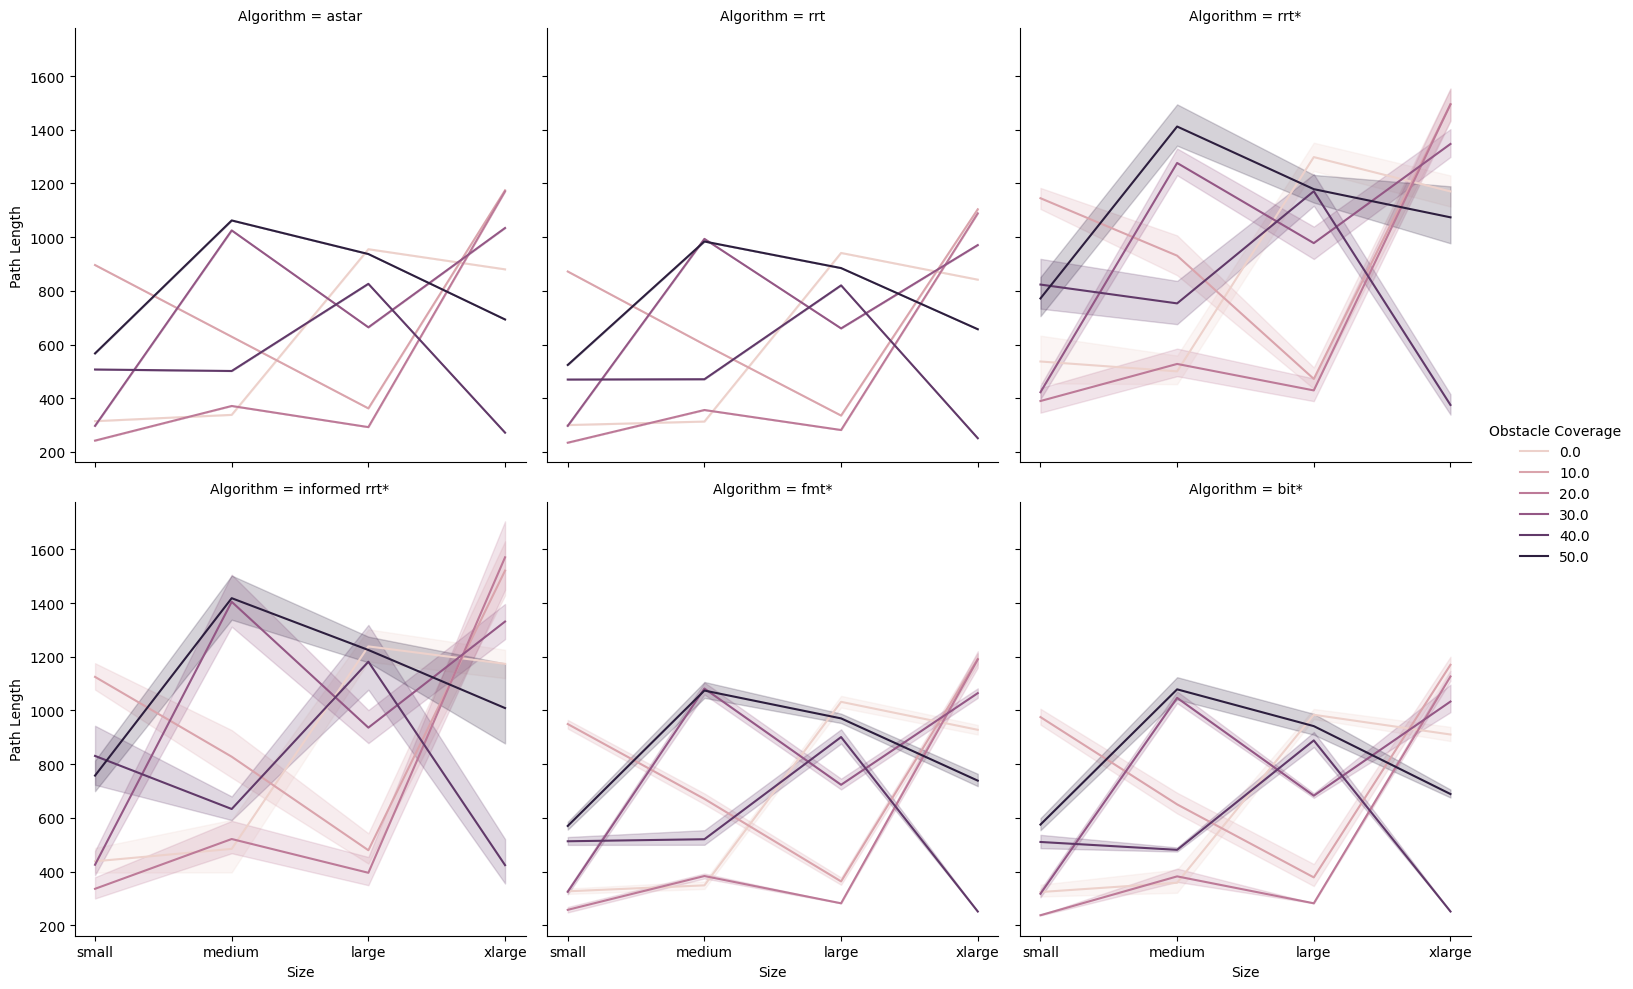

In [65]:
import seaborn as sns

sns.relplot(data=df, x="Size", y="Path Length", hue="Obstacle Coverage", col="Algorithm", col_wrap=3, kind="line")


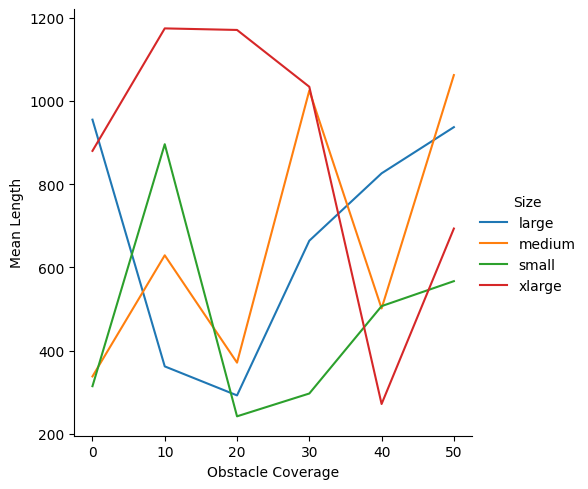

In [66]:
sns.relplot(data=algo_data["astar"], x="Obstacle Coverage", y="Mean Length", hue="Size", kind="line")


In [70]:
import matplotlib.pyplot as plt
import numpy as np

# Define function to plot path length vs obstacle coverage
def plot_path_length_vs_obstacle_coverage(data):
    algorithms = data.keys()
    map_sizes = ['small', 'medium', 'large', 'xlarge']
    fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
    for i, ax in enumerate(axs.flatten()):
        map_size = map_sizes[i]
        for algorithm in algorithms:
            algo_data = data[algorithm].loc[map_size]
            ax.plot(algo_data.index, algo_data['Mean Length'], label=algorithm)
        ax.set_title('Map Size: {}'.format(map_size))
        ax.set_xlabel('Obstacle Coverage')
        ax.set_ylabel('Mean Path Length')
        ax.set_ylim(bottom=0)
        ax.legend()
    fig.suptitle('Path Length vs Obstacle Coverage', fontsize=16)
    fig.tight_layout()
    plt.show()

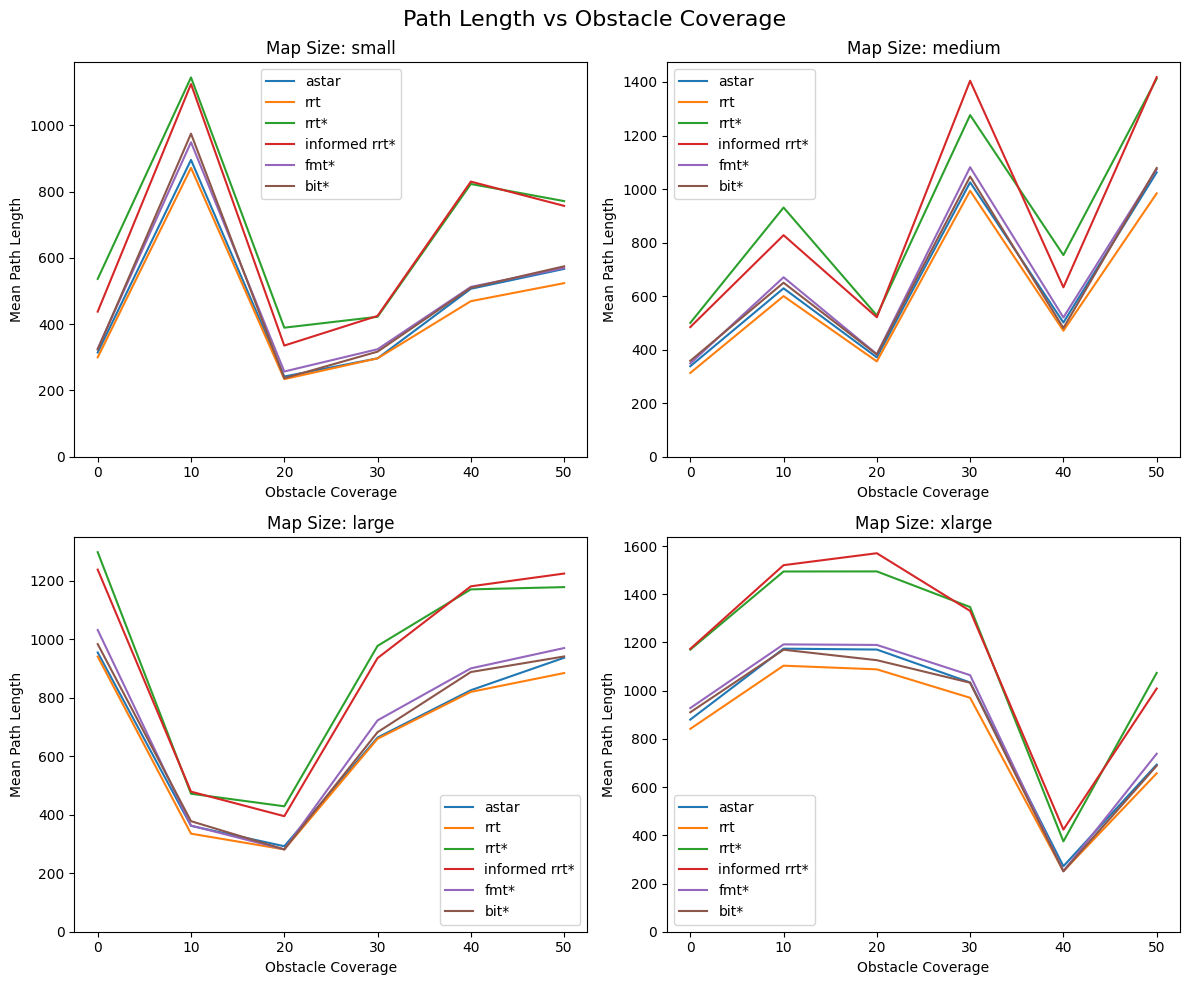

In [71]:
plot_path_length_vs_obstacle_coverage(algo_data)